In [26]:
# Apply K-Means Clustering technique of machine learning to solve the given problem.

# We have given a collection of 8 points. P1=[0.1,0.6] P2=[0.15,0.71] P3=[0.08,0.9] 
# P4=[0.16, 0.85] P5=[0.2,0.3] P6=[0.25,0.5] P7=[0.24,0.1] P8=[0.3,0.2]. Perform the kmean clustering with initial centroids as m1=P1 =Cluster#1=C1 and m2=P8=cluster#2=C2. 

# Answer the following 
# 1] Which cluster does P6 belongs to? 
# 2] What is the population of cluster around m2? 
# 3] What is updated value of m1 and m2?
# 4] What is the best value of K for the given problem

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [18]:
x = np.array([[0.1,0.6],[0.15,0.71],[0.08,0.9],[0.16, 0.85],[0.2,0.3],[0.25,0.5],[0.24,0.1],[0.3,0.2]])
m1 = [0.1,0.6]
m2 = [0.3,0.2]
x

array([[0.1 , 0.6 ],
       [0.15, 0.71],
       [0.08, 0.9 ],
       [0.16, 0.85],
       [0.2 , 0.3 ],
       [0.25, 0.5 ],
       [0.24, 0.1 ],
       [0.3 , 0.2 ]])

In [19]:
centroids = np.array([m1,m2])
centroids

array([[0.1, 0.6],
       [0.3, 0.2]])

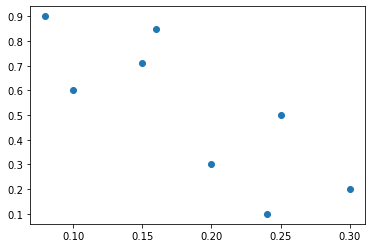

In [5]:
plt.figure()
plt.scatter(x[:,0],x[:,1])
plt.show()

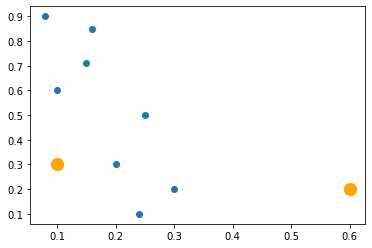

In [8]:
plt.figure()
plt.scatter(x[:,0],x[:,1])
plt.scatter(m1,m2,c='orange',s=150)
plt.show()

In [16]:
model = KMeans(n_clusters=2,init=centroids,n_init=1,random_state=0)
model.fit(x)

KMeans(init=array([[0.1, 0.6],
       [0.3, 0.2]]), n_clusters=2, n_init=1,
       random_state=0)

In [17]:
model.labels_

array([0, 0, 0, 0, 1, 0, 1, 1])

In [21]:
# 1] Which cluster does P6 belongs to? 
model.labels_[5]

0

In [22]:
# 2] What is the population of cluster around m2
sum(model.labels_==1)

3

In [24]:
# 3] What is updated value of m1 and m2? 
print(m1,m2)
print(model.cluster_centers_[0],model.cluster_centers_[1])

[0.1, 0.6] [0.3, 0.2]
[0.148 0.712] [0.24666667 0.2       ]


c:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


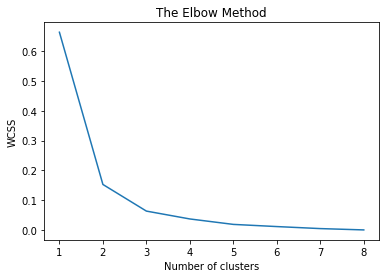

In [25]:
# 4] What is the best value of K for the given problem = 4
# Finding optimum no of clusters

wcss = []
for i in range(1,9):
    kmeans = KMeans(n_clusters=i,init='k-means++',n_init=10,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.figure()
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.plot(range(1,9),wcss)
plt.show()